## Spatial Data Analysis
## Exercise 2
Artur Szewczykowski

<b>Purpose: Create a static map illustrating changes in population density in Europe between 2014 and 2017.</b>

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

<b>1. Loading data </b>

In [5]:
countries = gpd.read_file('countries.geojson')
population_density = gpd.read_file('population_density.geojson')

<b>2. Data projection (Web Mercator).</b>

In [6]:
countries = countries.to_crs(epsg=3857)
population_density = population_density.to_crs(epsg=3857)

<b>3. Percentage change in population density between 2014 and 2017.</b>

In [7]:
population_density['percent_change'] = (
    (population_density['PopDen_PD2017'] - population_density['PopDen_PD2014']) / 
    population_density['PopDen_PD2014']) * 100

<b>4. Classification of percentage change in population density into intervals with values ​​of -5, 0, 5, 10.</b>

In [8]:
bins = [-float('inf'), -5, 0, 5, 10, float('inf')]
labels = ['< -5%', '-5% to 0%', '0% to 5%', '5% to 10%', '> 10%']

population_density['change_class'] = pd.cut(population_density['percent_change'], bins=bins, labels=labels)

<b>5. Static map of population density changes in Europe </b>

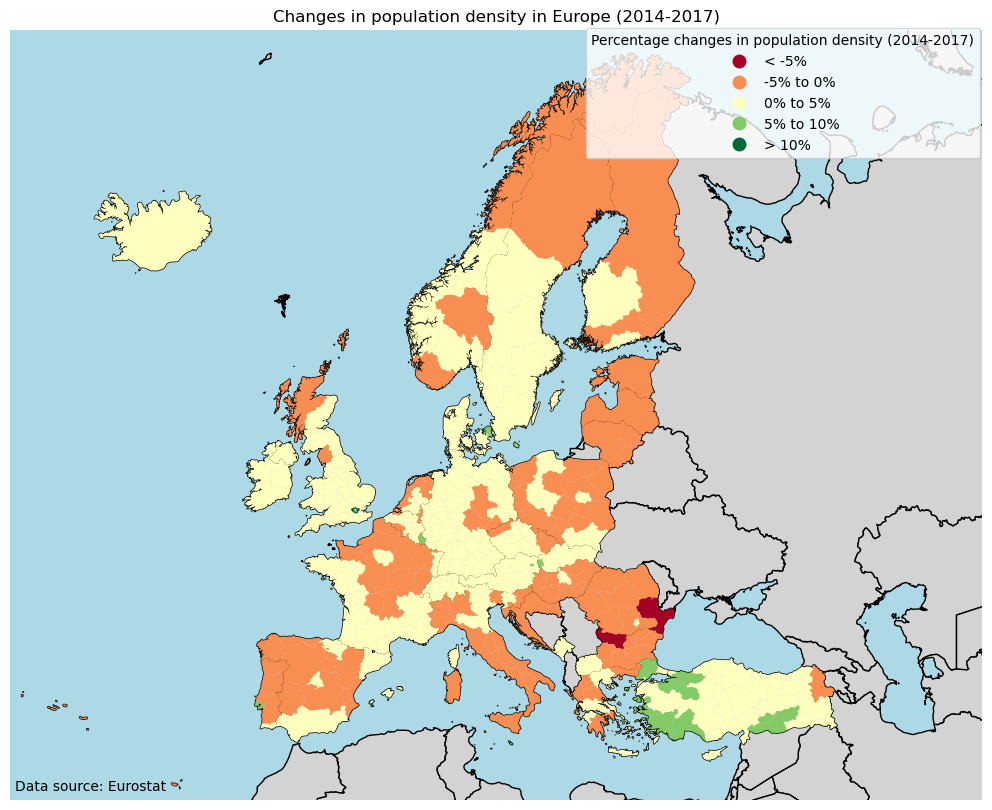

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_facecolor('lightblue')
xmin, ymin, xmax, ymax = countries.total_bounds
ax.fill_between([xmin, xmax], ymin, ymax, color='lightblue')
countries.plot(ax=ax, color='lightgrey', edgecolor='black')

population_density.plot(
    ax=ax, 
    column='change_class', 
    legend=True, 
    cmap='RdYlGn',
    legend_kwds={ 
        'title': 'Percentage changes in population density (2014-2017)', 
        'loc': 'lower left',
        'fontsize': 10, 
        'bbox_to_anchor': (0.585, 0.825),   
    }
)

ax.set_xlim([-3.6e6, 6.5e6])
ax.set_ylim([3.7e6, 1.17e7])
ax.text(-3.55e6, 3.8e6, "Data source: Eurostat", fontsize=10, color='black')
ax.set_title('Changes in population density in Europe (2014-2017)', fontsize=12)
ax.axis('off')

plt.savefig('Exercise_2_map.png', dpi=300, bbox_inches='tight')